<h2>Simple notebook to demonstrate the interpolation optiosn in the downscaling tools</h2>

In [13]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
from  e2o_utils import *
FNlowResDEM = 'data/DEM-WRR1.tif'
FNhighResDEM = '../examples/getvar/wflow_dem.map'
logger = None

In [15]:
resX, resY, cols, rows, highResLon, highResLat, highResDEM, FillVal = readMap(FNhighResDEM,'GTiff',logger)
LresX, LresY, Lcols, Lrows, lowResLon, lowResLat, lowResDEM, FillVal = readMap(FNlowResDEM,'GTiff',logger)

In [16]:
resLowResDEM = resample_grid(lowResDEM,lowResLon, lowResLat,highResLon, highResLat,method='linear',FillVal=0.0)
resLowResDEMNear = resample_grid(lowResDEM,lowResLon, lowResLat,highResLon, highResLat,method='nearest',FillVal=0.0)

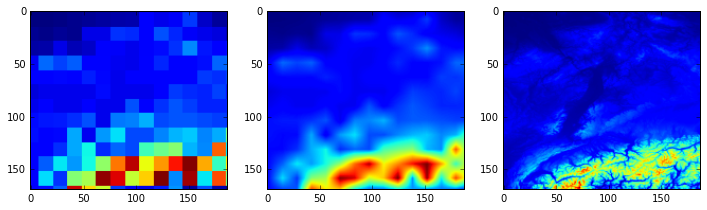

In [17]:
fig, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].imshow(resLowResDEMNear)
ax[1].imshow(resLowResDEM)
ax[2].imshow(highResDEM)